# EDA Cine

## 1. Instalar paquetes

In [5]:
import pandas 
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Carga de datos

In [6]:
filename = './tmdb_5000_movies.csv'
data = pandas.read_csv(filename, header=0)

## 3. Limpieza de base de datos

### 3.1. Descriptivos

In [7]:
print(data.shape)
print(data.head().transpose())


(4803, 20)
                                                                      0  \
budget                                                        237000000   
genres                [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
homepage                                    http://www.avatarmovie.com/   
id                                                                19995   
keywords              [{"id": 1463, "name": "culture clash"}, {"id":...   
original_language                                                    en   
original_title                                                   Avatar   
overview              In the 22nd century, a paraplegic Marine is di...   
popularity                                                   150.437577   
production_companies  [{"name": "Ingenious Film Partners", "id": 289...   
production_countries  [{"iso_3166_1": "US", "name": "United States o...   
release_date                                                 2009-12-10   
revenue       

In [8]:
print(data.dtypes) 
#print(data["spoken_languages"])
print(data["release_date"])

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object
0       2009-12-10
1       2007-05-19
2       2015-10-26
3       2012-07-16
4       2012-03-07
           ...    
4798    1992-09-04
4799    2011-12-26
4800    2013-10-13
4801    2012-05-03
4802    2005-08-05
Name: release_date, Length: 4803, dtype: object


Los data type concuerdan con el tipo de dato que quieren mostrar

### 3.2. Nulos y Duplicados

In [9]:
print(data.isnull().sum()) #hay nulos
print("La cantidad de duplicados es:" , data.duplicated().sum())  #no hay duplicados

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64
La cantidad de duplicados es: 0


### 3.3. Limpieza de Nulos

In [10]:
dataClean = data
dataClean['homepage'].fillna('null',inplace= True) #ambos son strings no pasa nada si no tienen este campo
dataClean['tagline'].fillna('null',inplace= True) 
dataClean['overview'].fillna('null',inplace= True)
#elimino las filas de los que tienen nulos y no son significativos, en este caso 2 filas de release_date y 1 de runtime
dataClean.dropna(inplace= True)
print(dataClean.isnull().sum())

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64


Se puede ver que hay datos nulos, no hay duplicados y los tipos de datos concuerdan con lo que expresa la columna


## 4. Analisis

### Duracion con mas popularidad

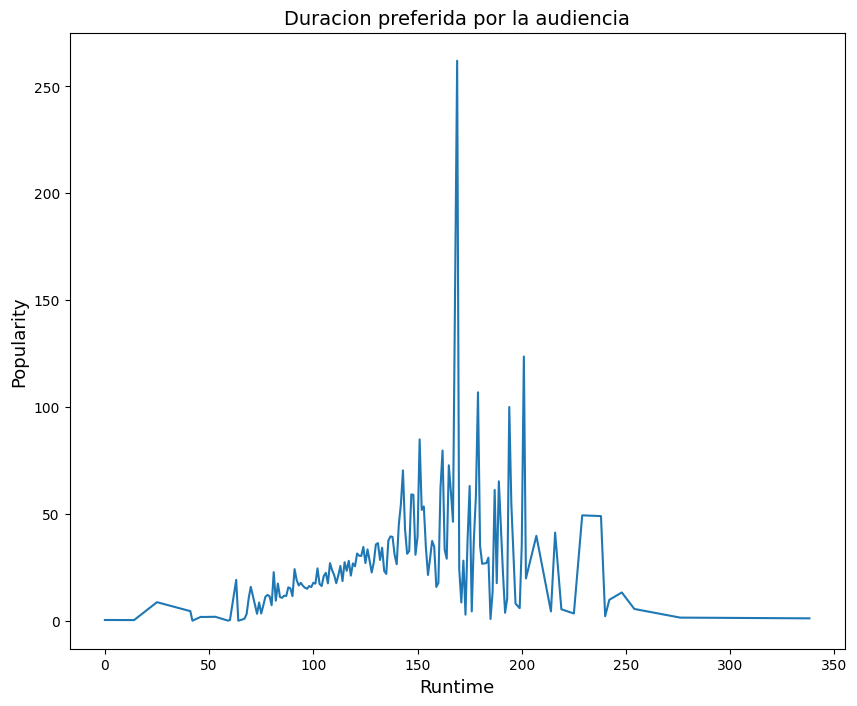

Duracion preferida por la audiencia 169.0 minutos.


In [11]:
run_pop=dataClean.groupby('runtime')['popularity'].mean()
run_pop.plot(figsize = (10,8))
#title            
plt.title("Duracion preferida por la audiencia",fontsize=14)            
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Popularity',fontsize = 13)
#max_value
max_run= run_pop.idxmax()

plt.show()

print('Duracion preferida por la audiencia', max_run, 'minutos.')

### Correlacion entre popularidad recaudacion  

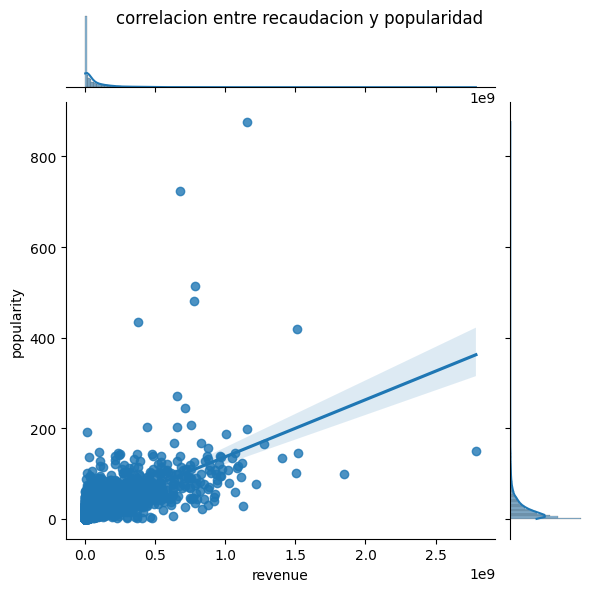

Correlacion entre recaudacion y popularidad :  0.6446539582523324


In [17]:
fig1 = sns.jointplot(x = "revenue", y = "popularity", kind = "reg", data = dataClean)
fig1.fig.suptitle('correlacion entre recaudacion y popularidad');
plt.show()

correlacion = dataClean.corr()
print("Correlacion entre recaudacion y popularidad : ",correlacion.loc['revenue','popularity'])

### Correlacion entre presupeusto y recaudacion

In [ ]:
fig2 = sns.jointplot(x = "revenue", y = "budget", kind = "reg", data = dataClean)
fig1.fig.suptitle('correlacion entre recaudacion y presupuesto');
plt.show()
#Ver como achicar los puntos (queda desprolijo)
correlacion = dataClean.corr()
print("Correlacion entre recaudacion y presupuesto : ",correlacion.loc['revenue','budget'])

### Genero mas populares

In [25]:
popular_and_genres_data = data[['original_title', 'popularity', 'genres']]
print(data['genres'])

#mean_popular_vs_genre_data = popular_and_genres_data.groupby(['genres']).mean()
#mean_popular_vs_genre_data = mean_popular_vs_genre_data.sort_values('popularity', ascending=False)
#mean_popular_vs_genre_data.head()

0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
                              ...                        
4798    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4799    [{"id": 35, "name": "Comedy"}, {"id": 10749, "...
4800    [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...
4801                                                   []
4802                  [{"id": 99, "name": "Documentary"}]
Name: genres, Length: 4800, dtype: object


### Recaudacion por año

release_date
1916        8394751
1925       22000000
1927         650422
1929        4358000
1930        8000000
           ...     
2013    23411493295
2014    24120490589
2015    22775024221
2016    14461156948
2017              0
Name: revenue, Length: 90, dtype: int64


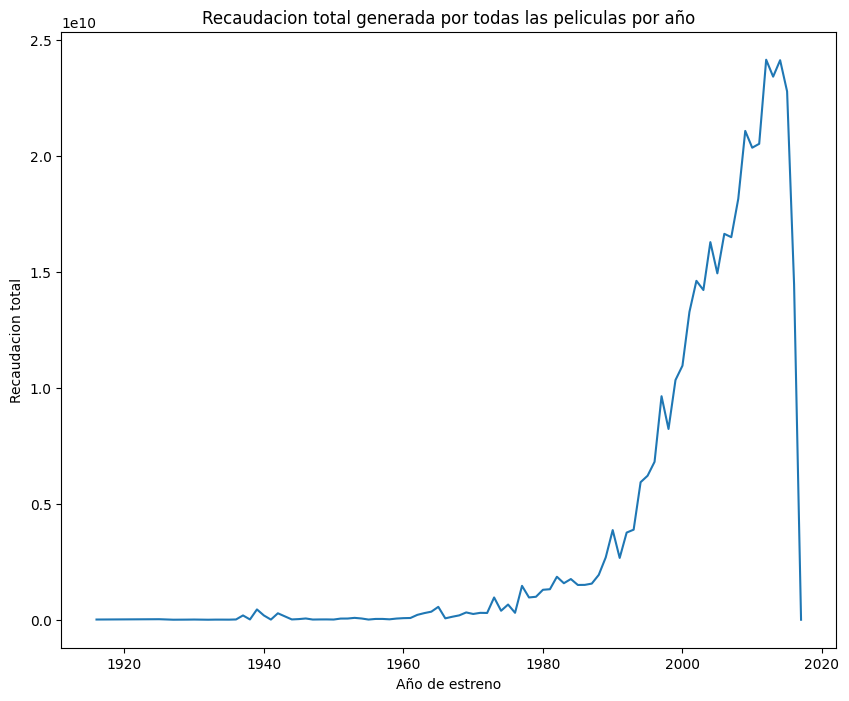

La industria cinematografica logro su mayor recaudacion total en 2012 .


In [13]:

#paso a datetime object
dataClean["release_date"] = pandas.to_datetime(dataClean["release_date"]) #lo paso a limpieza a esto
revenue_peryear = dataClean.groupby(dataClean["release_date"].dt.year)['revenue'].sum()

print(revenue_peryear)
ax = revenue_peryear.plot(stacked=True, figsize=(10,8));
ax.set(xlabel='Año de estreno', ylabel='Recaudacion total', title = 'Recaudacion total generada por todas las peliculas por año')
plt.show()

max_revenue= revenue_peryear.idxmax()

print('La industria cinematografica logro su mayor recaudacion total en', max_revenue,'.')

### Companias de produccion TOP 


In [12]:
# tambien es object 'Production companies', hay q resolver el error

TOP_COMPANIAS = 15
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Counts', y='Value', data=dataClean['Production_companies'][:TOP_COMPANIAS], palette='Spectral')
ax.set_title(label='Distribucion de las top {} companias'.format(TOP_COMPANIAS))
ax.set_ylabel('')
ax.set_xlabel('Number of movies')
plt.show()

KeyError: 'Production_companies'

<Figure size 1600x800 with 0 Axes>

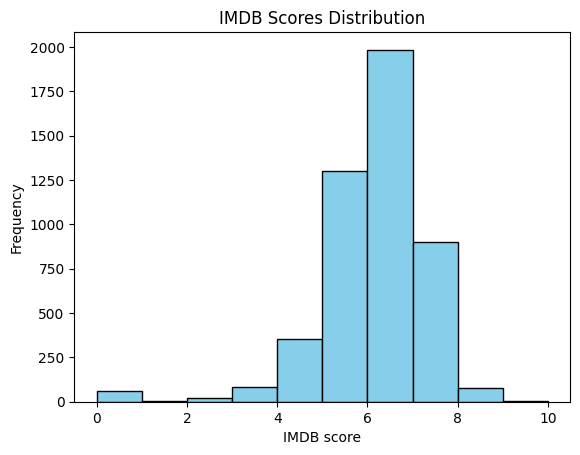

In [14]:
plt.title("IMDB Scores Distribution") #setting the title of the plot
plt.xlabel('IMDB score') # setting the x label of the plot
plt.ylabel('Frequency') # setting the y label of the plot
plt.hist(dataClean['vote_average'], color="skyblue", edgecolor='black');